#1. https://stackoverflow.com/questions/55736800/smooth-plotting-all-columns-of-a-data-frame

In [267]:
import pandas as pd
import numpy as np

In [268]:
data = pd.read_clipboard()

In [269]:
data.drop(['Index'], axis=1, inplace=True)
data

,Date,AA,BB,CC,DD,EE,FF
0,2019-01-15,0.0,-1.0,0.0,0.0,0.0,2.0
1,2019-01-17,0.0,-1.0,-1.0,-1.0,0.0,2.0
2,2019-01-22,1.0,-1.0,1.0,-1.0,0.0,2.0
3,2019-01-24,0.0,0.0,0.0,0.0,0.0,2.0
4,2019-01-29,1.0,0.0,-1.0,0.0,-1.0,2.0
5,2019-01-31,0.0,-1.0,0.0,0.0,0.0,2.0
6,2019-02-05,1.0,1.0,1.0,0.0,1.0,2.0
7,2019-02-12,2.0,1.0,1.0,0.0,2.0,2.0


In [270]:
def add_smooth_plots(df, ax,  timecolumn='Date', interpolation_method='cubic', colors='rgbky'):
    from itertools import cycle
    ind = pd.to_datetime(df.loc[:, timecolumn])
    tick_labels =ind.dt.strftime("%Y-%m-%d")
    color = cycle(colors)
    for i, col in enumerate(df.columns):
        if col != timecolumn:
            c = next(color)
            s = pd.Series(df.loc[:, col].values, index=ind)
            intp = s.resample('0.5D').interpolate(method=interpolation_method)
            true_ticks = intp.index.isin(ind)
            vals = intp.values
            intp = intp.reset_index()
            ticks = intp.index[true_ticks]
            ax.plot(np.arange(len(vals)), vals, label=col, color=c)
            ax.set_xticks(ticks)
            ax.set_xticklabels(tick_labels.values, rotation=45)
            ax.legend(title='Columns')
    return ax



In [271]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

In [272]:
add_smooth_plots(data, ax)


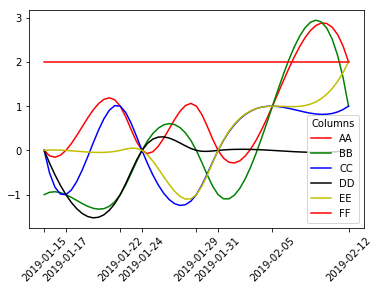

In [273]:
plt.show()


#2. https://stackoverflow.com/questions/55739440/why-unboundlocalerror-occurs-when-inner-function-assign-value-to-local-variables/55739465?noredirect=1#comment98156261_55739465

In [1]:
Lets look at bytecode: 

import dis


def outer2():
    number = 20
    def inner():
        if number >= 20:
            number
    inner()



def outer3():
    number = 20
    def inner():
        if number >= 20:
            number = number + 1
    inner()


def outer4():
    number = 20
    def inner():
        nonlocal number
        if number >= 20:
            number = number + 1
    inner()

>>> dis.dis(outer2)
  2           0 LOAD_CONST               1 (20)
              3 STORE_DEREF              0 (number)

  3           6 LOAD_CLOSURE             0 (number)
              9 BUILD_TUPLE              1
             12 LOAD_CONST               2 (<code object inner at 0x7ff003b56b70, file "<stdin>", line 3>)
             15 LOAD_CONST               3 ('outer2.<locals>.inner')
             18 MAKE_CLOSURE             0
             21 STORE_FAST               0 (inner)

  6          24 LOAD_FAST                0 (inner)
             27 CALL_FUNCTION            0 (0 positional, 0 keyword pair)
             30 POP_TOP
             31 LOAD_CONST               0 (None)
             34 RETURN_VALUE


>>> dis.dis(outer3)
  2           0 LOAD_CONST               1 (20)
              3 STORE_FAST               0 (number)

  3           6 LOAD_CONST               2 (<code object inner at 0x7ff003b56ae0, file "<stdin>", line 3>)
              9 LOAD_CONST               3 ('outer3.<locals>.inner')
             12 MAKE_FUNCTION            0
             15 STORE_FAST               1 (inner)

  6          18 LOAD_FAST                1 (inner)
             21 CALL_FUNCTION            0 (0 positional, 0 keyword pair)
             24 POP_TOP
             25 LOAD_CONST               0 (None)
             28 RETURN_VALUE


>>> dis.dis(outer4)
  2           0 LOAD_CONST               1 (20)
              3 STORE_DEREF              0 (number)

  3           6 LOAD_CLOSURE             0 (number)
              9 BUILD_TUPLE              1
             12 LOAD_CONST               2 (<code object inner at 0x7ff003af7e40, file "<stdin>", line 3>)
             15 LOAD_CONST               3 ('outer4.<locals>.inner')
             18 MAKE_CLOSURE             0
             21 STORE_FAST               0 (inner)

  7          24 LOAD_FAST                0 (inner)
             27 CALL_FUNCTION            0 (0 positional, 0 keyword pair)
             30 POP_TOP
             31 LOAD_CONST               0 (None)
             34 RETURN_VALUE

From these examples one can see, that trying to assign to a variable (that wasn't declared as nonlocal) 
yields in `MAKE_FUNCTION` opcode. But only closures allow to get access variables out of the current scope. 
You can also read more about closures [here](https://www.geeksforgeeks.org/python-closures/).

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 37)